# Overview

The premise of the project is to determine the shot zones of the court, and calculate for each team the shot distribution (the percentage of team shots attempted within a specified zone) and eFG% (effective field goal percentage) of team shots within the specified zone.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from matplotlib import image
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
from matplotlib.path import Path
from matplotlib.patches import PathPatch

sns.set_style('white')
sns.set_color_codes()

In [2]:
df = pd.read_csv('shots_data.csv')
df

,team,x,y,fgmade
0,Team A,-5.0,26.4,0
1,Team A,-0.8,1.2,1
2,Team A,-13.9,9.5,1
3,Team A,-5.4,26.2,0
4,Team A,-4.9,14.5,1
...,...,...,...,...
499,Team B,-0.5,2.2,0
500,Team B,3.5,7.6,0
501,Team B,0.2,8.8,0
502,Team B,-0.6,0.7,1


In [3]:
df.shape

(504, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   team    504 non-null    object 
 1   x       504 non-null    float64
 2   y       504 non-null    float64
 3   fgmade  504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
df.isna().sum()

team      0
x         0
y         0
fgmade    0
dtype: int64

In [6]:
df.describe()

,x,y,fgmade
count,504.000000,504.000000,504.000000
mean,0.494841,10.151587,0.430556
std,10.309875,9.026447,0.495646
min,-23.900000,-2.700000,0.000000
25%,-4.425000,1.575000,0.000000
50%,0.200000,7.900000,0.000000
75%,6.000000,18.625000,1.000000
max,23.800000,28.700000,1.000000


In [7]:
# Effective Field Goal Percentage
# eFG = FGM + (0.5 * 3PM) / FGA

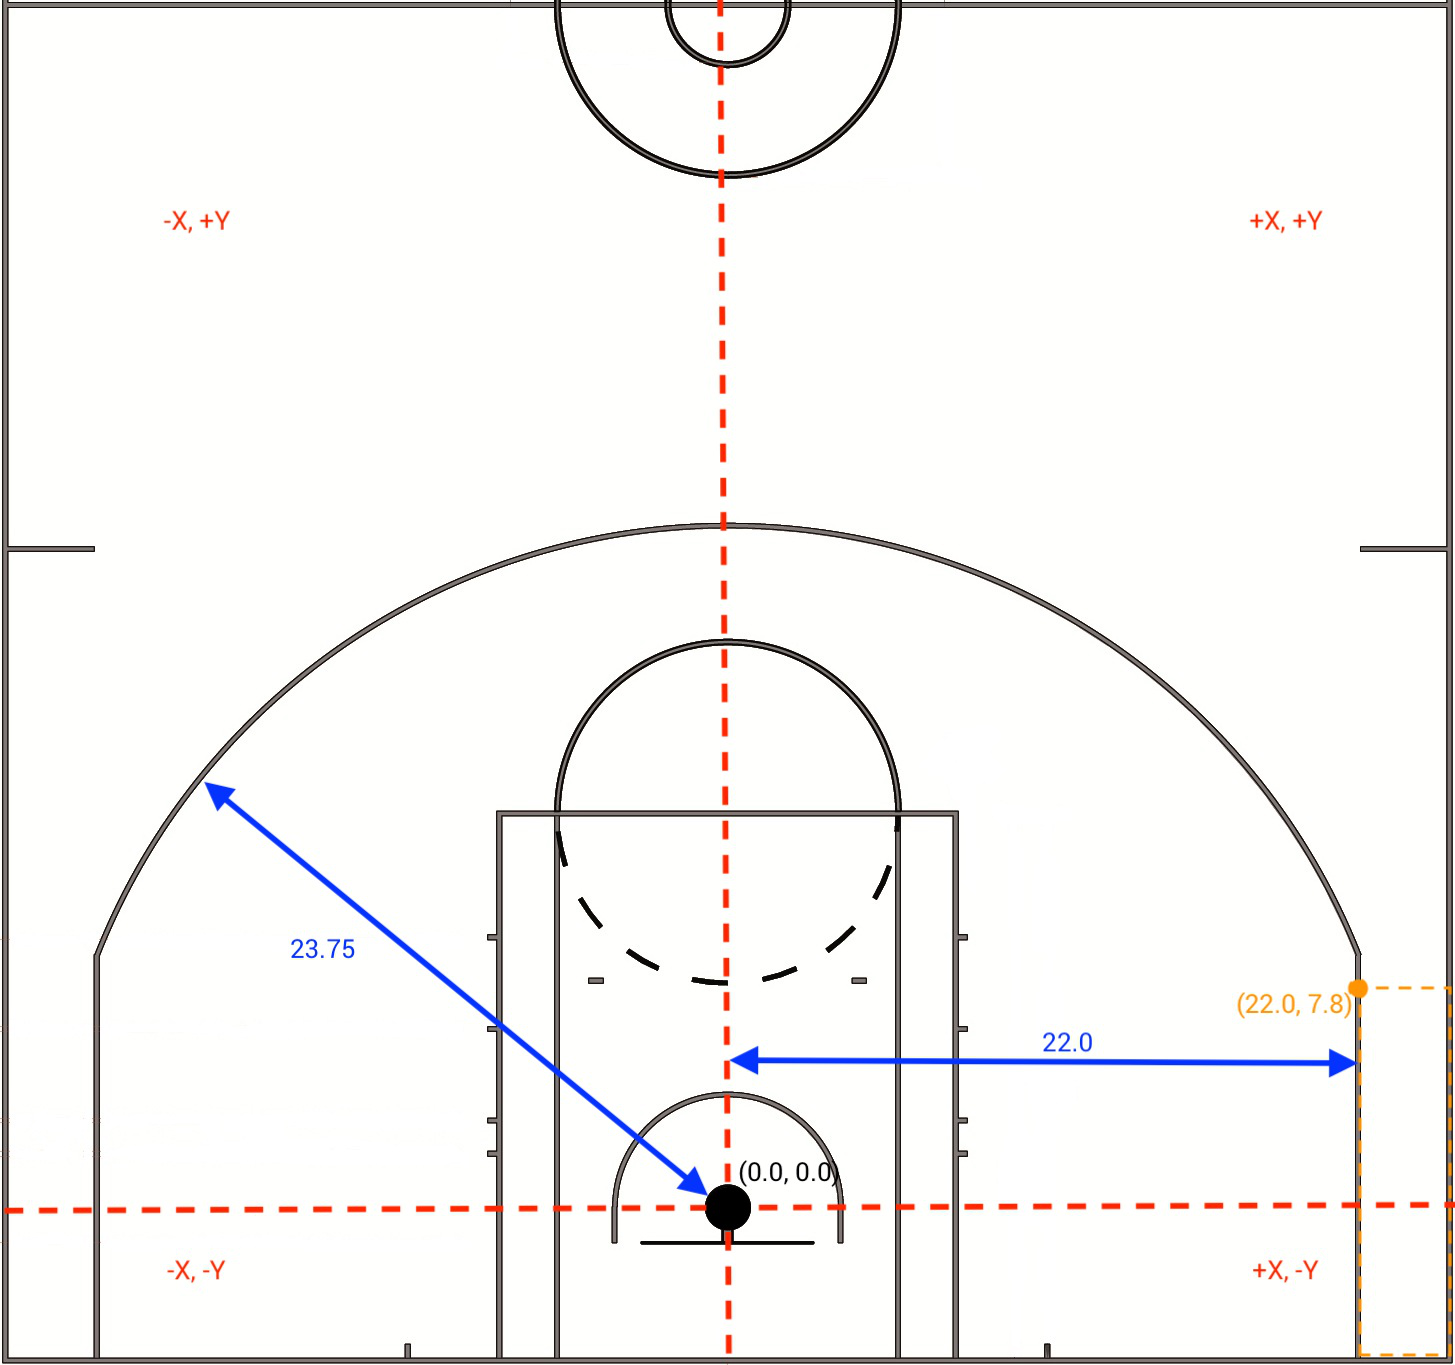

In [8]:
from IPython.display import display
from PIL import Image
img_PIL = Image.open(r'court_diagram.jpg')
display(img_PIL)

# Team A Breakdown

In [9]:
Team_A = df.loc[df['team'] == 'Team A']
Team_A

,team,x,y,fgmade
0,Team A,-5.0,26.4,0
1,Team A,-0.8,1.2,1
2,Team A,-13.9,9.5,1
3,Team A,-5.4,26.2,0
4,Team A,-4.9,14.5,1
...,...,...,...,...
275,Team A,-2.7,24.5,0
276,Team A,4.2,10.3,1
277,Team A,-9.0,1.2,1
278,Team A,1.4,-0.1,0


In [10]:
Team_A.describe()

,x,y,fgmade
count,280.000000,280.000000,280.000000
mean,0.444643,9.833929,0.446429
std,10.610395,9.070589,0.498012
min,-23.900000,-1.200000,0.000000
25%,-5.000000,1.500000,0.000000
50%,0.300000,6.100000,0.000000
75%,6.750000,18.425000,1.000000
max,23.800000,27.200000,1.000000


In [11]:
Team_A['fgmade'].value_counts()

0    155
1    125
Name: fgmade, dtype: int64

In [12]:
Team_A_pct = Team_A['fgmade'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

In [13]:
Team_A_pct.head()

0    55.4%
1    44.6%
Name: fgmade, dtype: object

In [14]:
Team_A_fg = pd.concat([Team_A['fgmade'].value_counts(), Team_A_pct],axis=1)
Team_A_fg.columns=['count','percentage']

In [15]:
Team_A_fg.head()

,count,percentage
0,155,55.4%
1,125,44.6%


In [16]:
Team_A_made = Team_A.loc[Team_A['fgmade'] == 1]
Team_A_made

,team,x,y,fgmade
1,Team A,-0.8,1.2,1
2,Team A,-13.9,9.5,1
4,Team A,-4.9,14.5,1
5,Team A,-10.9,23.9,1
6,Team A,-12.0,23.6,1
...,...,...,...,...
269,Team A,-0.4,2.4,1
274,Team A,-10.9,24.5,1
276,Team A,4.2,10.3,1
277,Team A,-9.0,1.2,1


In [17]:
Team_A_missed = Team_A.loc[Team_A['fgmade'] == 0]
Team_A_missed

,team,x,y,fgmade
0,Team A,-5.0,26.4,0
3,Team A,-5.4,26.2,0
7,Team A,-7.3,5.7,0
9,Team A,1.4,1.6,0
10,Team A,-0.3,2.3,0
...,...,...,...,...
271,Team A,9.5,0.3,0
272,Team A,-2.5,1.7,0
273,Team A,-5.0,2.9,0
275,Team A,-2.7,24.5,0


## Team A Corner 3

In [18]:
Team_A_Corner_3 = Team_A[(Team_A.x >= 22.0) & (Team_A.y <= 7.8)]
Team_A_Corner_3

,team,x,y,fgmade
32,Team A,23.1,-1.2,0
122,Team A,23.4,4.5,0
124,Team A,23.1,2.3,0
125,Team A,23.2,2.4,0
131,Team A,22.4,5.5,1
137,Team A,22.7,3.8,0
194,Team A,23.8,0.8,1
200,Team A,22.3,6.2,0
227,Team A,22.8,0.0,0


In [19]:
Team_A_Co_3 = Team_A[(Team_A.x <= -22.0) & (Team_A.y <= 7.8)]
Team_A_Co_3

,team,x,y,fgmade
36,Team A,-22.3,-0.8,1
38,Team A,-23.9,7.8,1
99,Team A,-22.9,4.5,1
118,Team A,-22.8,4.6,1
134,Team A,-22.9,0.6,1
193,Team A,-23.4,-1.1,0
196,Team A,-22.1,1.2,1
207,Team A,-23.0,0.8,1
221,Team A,-22.2,3.9,0


In [20]:
Team_A_Made_Corner_3 = Team_A_made[(Team_A_made.x > 22.0) & (Team_A_made.y <= 7.8)]
Team_A_Made_Corner_3

,team,x,y,fgmade
131,Team A,22.4,5.5,1
194,Team A,23.8,0.8,1


In [21]:
Team_A_Made_Co_3 = Team_A_made[(Team_A_made.x < -22.0) & (Team_A_made.y <= 7.8)]
Team_A_Made_Co_3

,team,x,y,fgmade
36,Team A,-22.3,-0.8,1
38,Team A,-23.9,7.8,1
99,Team A,-22.9,4.5,1
118,Team A,-22.8,4.6,1
134,Team A,-22.9,0.6,1
196,Team A,-22.1,1.2,1
207,Team A,-23.0,0.8,1


### Shot Distribution of Corner 3's for Team A:

In [22]:
Team_A_Corner_3.shape

(9, 4)

In [23]:
Team_A_Co_3.shape

(9, 4)

In [24]:
(18/280) * 100

6.428571428571428

## Team A Non Corner 3

In [25]:
Team_A_Non_Corner_3 = Team_A[(Team_A.x > 23.75) & (Team_A.y > 7.8)]
Team_A_Non_Corner_3

,team,x,y,fgmade


In [26]:
Team_A_Non_Corner_3 = Team_A[(Team_A.x < (-23.75)) & (Team_A.y > 7.8)]
Team_A_Non_Corner_3

,team,x,y,fgmade


In [27]:
Team_A_NC3 = Team_A[(Team_A.y > 7.8)].sort_values(by='y', ascending=False)
Team_A_NC3

,team,x,y,fgmade
45,Team A,-3.4,27.2,0
197,Team A,-2.8,26.6,0
223,Team A,5.1,26.5,0
0,Team A,-5.0,26.4,0
156,Team A,5.2,26.4,1
...,...,...,...,...
162,Team A,14.4,8.9,0
183,Team A,8.9,8.6,1
213,Team A,2.7,8.4,1
165,Team A,-8.9,8.3,0


In [28]:
Team_A_NC3.shape

(131, 4)

In [29]:
Non_C3 = Team_A[(Team_A.y > 23.75)].sort_values(by='y', ascending=False)
Non_C3

,team,x,y,fgmade
45,Team A,-3.4,27.2,0
197,Team A,-2.8,26.6,0
223,Team A,5.1,26.5,0
0,Team A,-5.0,26.4,0
156,Team A,5.2,26.4,1
3,Team A,-5.4,26.2,0
233,Team A,-0.2,25.8,0
167,Team A,6.2,25.8,0
18,Team A,0.6,25.6,1
206,Team A,-6.7,25.5,0


In [30]:
Non_C3.shape

(29, 4)

### Shot Distribution of Non Corner 3's for Team A:

In [ ]:
(/280) * 100

## Team A 2pt

### Shot Distribution of 2pt FG for Team A:

In [31]:
(262/280) * 100

93.57142857142857

## Team A EFg%

In [32]:
# Effective Field Goal Percentage
# eFG = FGM + (0.5 * 3PM) / FGA

### Team A C3

In [70]:
Team_A_Made_Corner_3.shape # 

(2, 4)

In [71]:
Team_A_Made_Co_3.shape

(7, 4)

In [73]:
((125 + (0.5 * 9)) / 280) * 100

46.25

### Team A NC3

In [34]:
(125 + (0.5 * 12)) / 280

0.46785714285714286

### Team A 2pt

In [35]:
(125 + (0.5 * 0)) / 280

0.44642857142857145

# Team B Breakdown

In [36]:
Team_B = df.loc[df['team'] == 'Team B']
Team_B

,team,x,y,fgmade
280,Team B,-2.9,16.7,0
281,Team B,10.3,24.7,0
282,Team B,-3.5,5.3,1
283,Team B,0.9,1.5,0
284,Team B,22.8,-1.5,0
...,...,...,...,...
499,Team B,-0.5,2.2,0
500,Team B,3.5,7.6,0
501,Team B,0.2,8.8,0
502,Team B,-0.6,0.7,1


In [37]:
Team_B.describe()

,x,y,fgmade
count,224.000000,224.000000,224.000000
mean,0.557589,10.548661,0.410714
std,9.944714,8.975387,0.493065
min,-23.300000,-2.700000,0.000000
25%,-4.025000,1.700000,0.000000
50%,-0.050000,8.750000,0.000000
75%,5.350000,19.550000,1.000000
max,23.400000,28.700000,1.000000


In [38]:
Team_B_pct = Team_B['fgmade'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

In [39]:
Team_B['fgmade'].value_counts()

0    132
1     92
Name: fgmade, dtype: int64

In [40]:
Team_B_pct.head()

0    58.9%
1    41.1%
Name: fgmade, dtype: object

In [41]:
Team_B_fg = pd.concat([Team_B['fgmade'].value_counts(), Team_B_pct],axis=1)
Team_B_fg.columns=['count','percentage']

In [42]:
Team_B_fg

,count,percentage
0,132,58.9%
1,92,41.1%


In [43]:
Team_B_made = Team_B.loc[Team_B['fgmade'] == 1].sort_values(by='y', ascending=False)
Team_B_made

,team,x,y,fgmade
357,Team B,2.7,25.6,1
493,Team B,7.9,25.4,1
327,Team B,8.7,24.2,1
439,Team B,-10.1,24.0,1
391,Team B,-9.3,23.8,1
...,...,...,...,...
297,Team B,0.7,-0.3,1
302,Team B,-4.9,-0.4,1
295,Team B,0.0,-0.5,1
436,Team B,0.0,-0.5,1


In [44]:
Team_B_missed = Team_B.loc[Team_B['fgmade'] == 0]
Team_B_missed

,team,x,y,fgmade
280,Team B,-2.9,16.7,0
281,Team B,10.3,24.7,0
283,Team B,0.9,1.5,0
284,Team B,22.8,-1.5,0
285,Team B,13.3,11.8,0
...,...,...,...,...
498,Team B,-4.3,26.4,0
499,Team B,-0.5,2.2,0
500,Team B,3.5,7.6,0
501,Team B,0.2,8.8,0


## Team B Corner 3

In [45]:
Team_B_Corner_3 = Team_B[(Team_B.x >= 22.0) & (Team_B.y <= 7.8)]
Team_B_Corner_3

,team,x,y,fgmade
284,Team B,22.8,-1.5,0
313,Team B,23.1,1.9,1
331,Team B,23.4,6.6,0
336,Team B,23.1,3.1,1
375,Team B,23.3,2.4,0
404,Team B,23.4,-1.2,0
413,Team B,22.8,4.7,1
414,Team B,22.0,0.7,0


In [46]:
Team_B_Co_3 = Team_B[(Team_B.x <= -22.0) & (Team_B.y <= 7.8)]
Team_B_Co_3

,team,x,y,fgmade
321,Team B,-23.1,0.5,0
335,Team B,-22.3,0.4,0
403,Team B,-22.5,5.9,0
418,Team B,-23.1,-2.7,1


### Shot Distribution of Corner 3's for Team B:

In [47]:
Team_B_Corner_3.shape

(8, 4)

In [48]:
Team_B_Co_3.shape

(4, 4)

In [49]:
(12/224) * 100

5.357142857142857

In [50]:
Team_B_Made_Corner_3 = Team_B_made[(Team_B_made.x > 22.0) & (Team_B_made.y <= 7.8)]
Team_B_Made_Corner_3

,team,x,y,fgmade
413,Team B,22.8,4.7,1
336,Team B,23.1,3.1,1
313,Team B,23.1,1.9,1


In [51]:
Team_B_Made_Corner_3 = Team_B_made[(Team_B_made.x <= -22.0) & (Team_B_made.y <= 7.8)]
Team_B_Made_Corner_3

,team,x,y,fgmade
418,Team B,-23.1,-2.7,1


## Team B Non Corner 3

In [52]:
Team_B_Non_Corner_3 = Team_B[((Team_B.x > 23.75) & Team_B.y > 7.8)].sort_values(by='y', ascending=True)
Team_B_Non_Corner_3

,team,x,y,fgmade


In [53]:
Team_B_Non_C3 = Team_B[(Team_B.x < (-23.75)) & (Team_B.y > 7.8)]
Team_B_Non_C3

,team,x,y,fgmade


In [54]:
Team_B_Non_Corner_3.shape

(0, 4)

In [68]:
NoCo3 = Team_B[(Team_B.x < (-23.75)) & (Team_B.y > 7.8)].sort_values(by='x', ascending=False)
NoCo3

,team,x,y,fgmade


In [56]:
Non_Corner_3 = Team_B[(Team_B.x < 23.75) & (Team_B.y > 7.8)]
Non_Corner_3

,team,x,y,fgmade
280,Team B,-2.9,16.7,0
281,Team B,10.3,24.7,0
285,Team B,13.3,11.8,0
286,Team B,-10.9,15.2,0
287,Team B,5.5,20.4,0
...,...,...,...,...
495,Team B,2.7,11.6,0
496,Team B,15.6,23.7,0
497,Team B,-15.0,22.2,1
498,Team B,-4.3,26.4,0


In [57]:
Non_Corner_3 = Team_B[(Team_B.x > 23.75) & (Team_B.y > 7.8)]
Non_Corner_3

,team,x,y,fgmade


In [58]:
NC3 = Team_B_made.loc[Team_B_made['y'] > 7.8]
NC3

,team,x,y,fgmade
357,Team B,2.7,25.6,1
493,Team B,7.9,25.4,1
327,Team B,8.7,24.2,1
439,Team B,-10.1,24.0,1
391,Team B,-9.3,23.8,1
489,Team B,11.4,23.1,1
395,Team B,-13.0,22.6,1
497,Team B,-15.0,22.2,1
479,Team B,-10.7,22.1,1
483,Team B,-11.8,21.5,1


In [59]:
NC3.shape

(42, 4)

In [60]:
NCo3 = Team_B_made.loc[Team_B_made['x'] > 22]
NCo3

,team,x,y,fgmade
421,Team B,22.6,8.7,1
413,Team B,22.8,4.7,1
336,Team B,23.1,3.1,1
313,Team B,23.1,1.9,1


In [76]:
Non_C3 = Team_B[(Team_B.y > 7.8)]
Non_C3

,team,x,y,fgmade
280,Team B,-2.9,16.7,0
281,Team B,10.3,24.7,0
285,Team B,13.3,11.8,0
286,Team B,-10.9,15.2,0
287,Team B,5.5,20.4,0
...,...,...,...,...
495,Team B,2.7,11.6,0
496,Team B,15.6,23.7,0
497,Team B,-15.0,22.2,1
498,Team B,-4.3,26.4,0


### Shot Distribution of Non Corner 3's for Team B:

In [ ]:
(/224) * 100

## Team B 2pt

### Shot Distribution of 2pt FG for Team B:

In [62]:
Team_B_2pt_shots = Team_B[(Team_B.x > -23.75) & (Team_B.x < 23.75) & (Team_B.y > 7.8)].sort_values(by='y', ascending=False)
Team_B_2pt_shots

,team,x,y,fgmade
289,Team B,8.5,28.7,0
372,Team B,9.3,27.1,0
498,Team B,-4.3,26.4,0
491,Team B,-5.1,26.2,0
454,Team B,-1.3,25.8,0
...,...,...,...,...
420,Team B,-6.6,8.4,0
400,Team B,-5.2,8.3,0
442,Team B,-23.1,8.1,0
416,Team B,-1.5,8.0,0


In [63]:
(212/224) * 100

94.64285714285714

## Team B EFg%

In [64]:
# Effective Field Goal Percentage
# eFG% = FGM + (0.5 * 3PM) / FGA

### Team B C3

In [32]:
((92 + (0.5 * 4)) / 224) * 100

41.964285714285715

### Team B NC3

In [35]:
(92 + (0.5 * 0)) / 224

0.4107142857142857

### Team B 2pt

In [67]:
(92 + (0.5 * 0))/ 224

0.4107142857142857

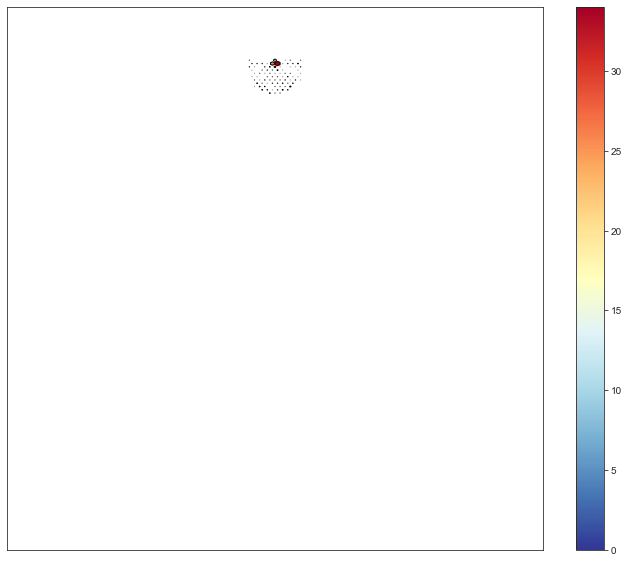

In [69]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))

hexbin = plt.hexbin(Team_A.x, Team_A.y, gridsize=10,cmap='RdYlBu_r',edgecolors='black',mincnt=0)

plt.xlim(-250,250)
plt.ylim(422.5, -47.5)

gca = plt.gca()
gca.axes.get_xaxis().set_visible(False)
gca.axes.get_yaxis().set_visible(False)

plt.colorbar()

#size bins by frequency
from matplotlib.collections import PatchCollection
from matplotlib.path import Path
from matplotlib.patches import PathPatch
def sized_hexbin(ax,hc):
    offsets = hc.get_offsets()
    orgpath = hc.get_paths()[0]
    verts = orgpath.vertices
    values = hc.get_array()
    ma = values.max()
    patches = []
    for offset,val in zip(offsets,values):
        v1 = verts*val/ma+offset
        path = Path(v1, orgpath.codes)
        patch = PathPatch(path)
        patches.append(patch)

    pc = PatchCollection(patches, cmap='RdYlBu_r', edgecolors='black')
    pc.set_array(values)
    ax.add_collection(pc)
    hc.remove()

sized_hexbin(ax,hexbin)

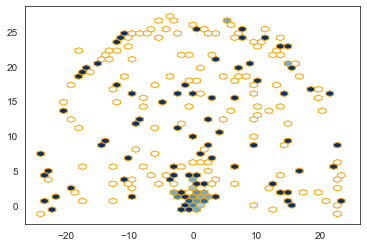

In [70]:
plt.hexbin(x=Team_A.x, y=Team_A.y, 
           C=Team_A.fgmade, gridsize=40, edgecolors='Orange', cmap='Blues');

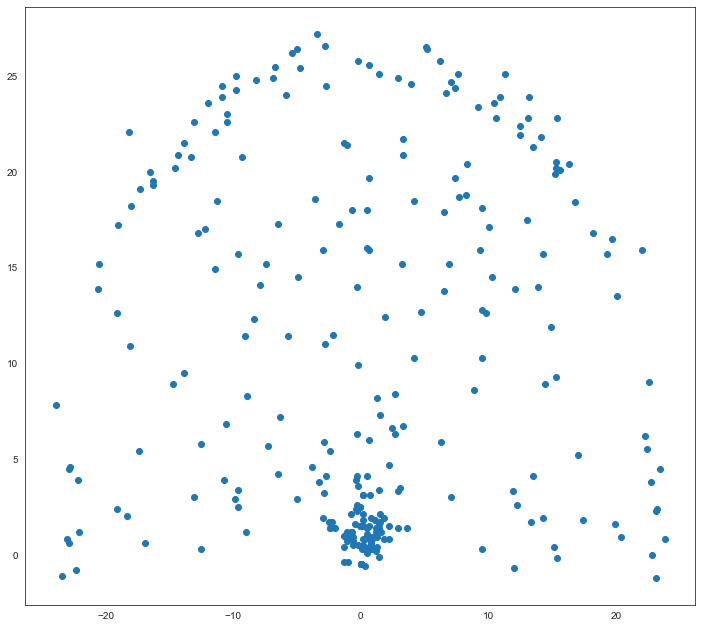

In [71]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(Team_A.x, Team_A.y)
plt.show()

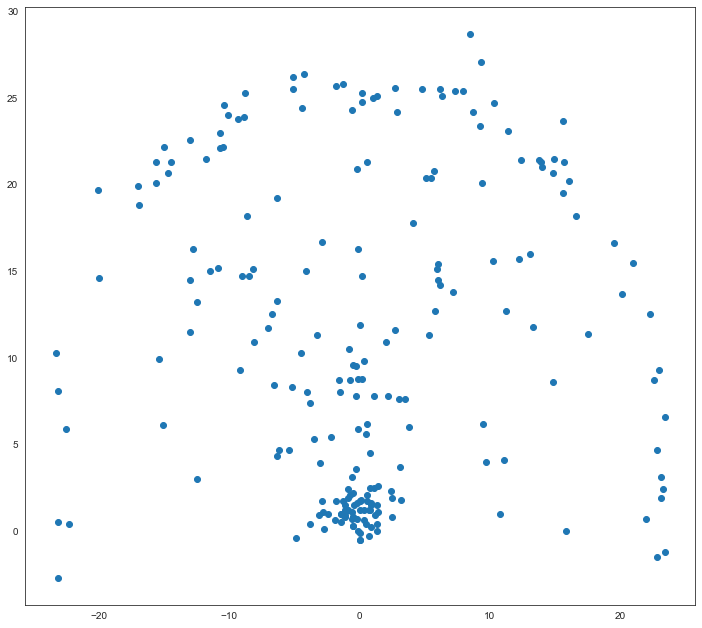

In [72]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(Team_B.x, Team_B.y)
plt.show()

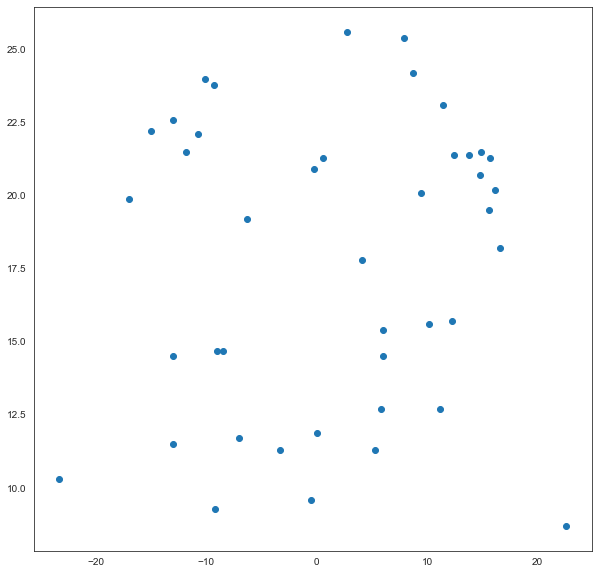

In [76]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(10,10))
plt.scatter(NC3.x, NC3.y)
plt.show()

In [75]:
NC3.shape

(42, 4)

In [48]:
def draw_court(ax=None, color="blue", lw=1, shotzone=False, outer_lines=False):
    """Returns an axes with a basketball court drawn onto to it.
    This function draws a court based on the x and y-axis values that the NBA
    stats API provides for the shot chart data.  For example the center of the
    hoop is located at the (0,0) coordinate.  Twenty-two feet from the left of
    the center of the hoop in is represented by the (-220,0) coordinates.
    So one foot equals +/-10 units on the x and y-axis.
    Parameters
    ----------
    ax : Axes, optional
        The Axes object to plot the court onto.
    color : matplotlib color, optional
        The color of the court lines.
    lw : float, optional
        The linewidth the of the court lines.
    outer_lines : boolean, optional
        If `True` it draws the out of bound lines in same style as the rest of
        the court.
    Returns
    -------
    ax : Axes
        The Axes object with the court on it.
    """
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    
    # Draw shotzone Lines
    # Based on Advanced Zone Mode
    if (shotzone == True):
        inner_circle = Circle((0, 0), radius=80, linewidth=lw, color='black', fill=False)
        outer_circle = Circle((0, 0), radius=160, linewidth=lw, color='black', fill=False)
        corner_three_a_x =  Rectangle((-250, 92.5), 30, 0, linewidth=lw, color=color)
        corner_three_b_x = Rectangle((220, 92.5), 30, 0, linewidth=lw, color=color)
        
        # 60 degrees
        inner_line_1 = Rectangle((40, 69.28), 80, 0, 60, linewidth=lw, color=color)
        # 120 degrees
        inner_line_2 = Rectangle((-40, 69.28), 80, 0, 120, linewidth=lw, color=color)
        
        # Assume x distance is also 40 for the endpoint
        inner_line_3 = Rectangle((53.20, 150.89), 290, 0, 70.53, linewidth=lw, color=color)
        inner_line_4 = Rectangle((-53.20, 150.89), 290, 0, 109.47, linewidth=lw, color=color)
        
        # Assume y distance is also 92.5 for the endpoint
        inner_line_5 = Rectangle((130.54, 92.5), 80, 0, 35.32, linewidth=lw, color=color)
        inner_line_6 = Rectangle((-130.54, 92.5), 80, 0, 144.68, linewidth=lw, color=color)
        
        
        # List of the court elements to be plotted onto the axes
        court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc, inner_circle, outer_circle,
                          corner_three_a_x, corner_three_b_x,
                          inner_line_1, inner_line_2, inner_line_3, inner_line_4, inner_line_5, inner_line_6]
    else:
        # List of the court elements to be plotted onto the axes
        court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc]
    
    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
        

    return ax

In [49]:
def drawchart(df, dotcolor, save, fname, color='white', lw=4,  
              axes_color='black', facecolor='white'):
    sns.set(rc={'figure.figsize':(5*2, 4.7*2), 
        'axes.facecolor':axes_color, 'figure.facecolor':facecolor})
    sns.set_style({'axes.grid' : False})
    sns.scatterplot(x='x', y='y', data=Team_A, color=dotcolor)
    draw_court(color=color, lw=lw)
    if save == True:
         plt.savefig(fname)

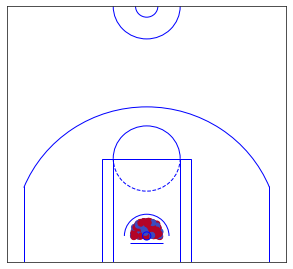

In [50]:
plt.figure(figsize=(5, 4.7))
plt.scatter(Team_A.x, Team_A.y, c=Team_A.fgmade, cmap='coolwarm_r')
draw_court(outer_lines=False)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.xlim(250, -250)
plt.ylim(-47.5, 422.5)
plt.show()

In [51]:
Team_A['fgmadebasket'] = Team_A['fgmade' == '1']

KeyError: False

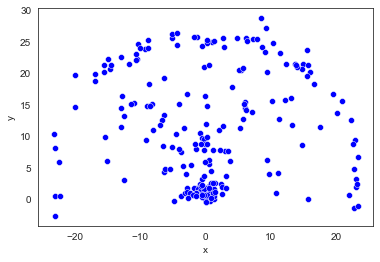

In [52]:
sns.scatterplot(x='x', y='y', data=Team_B, color='blue');
sns.set(rc={'figure.figsize':(20,20)})

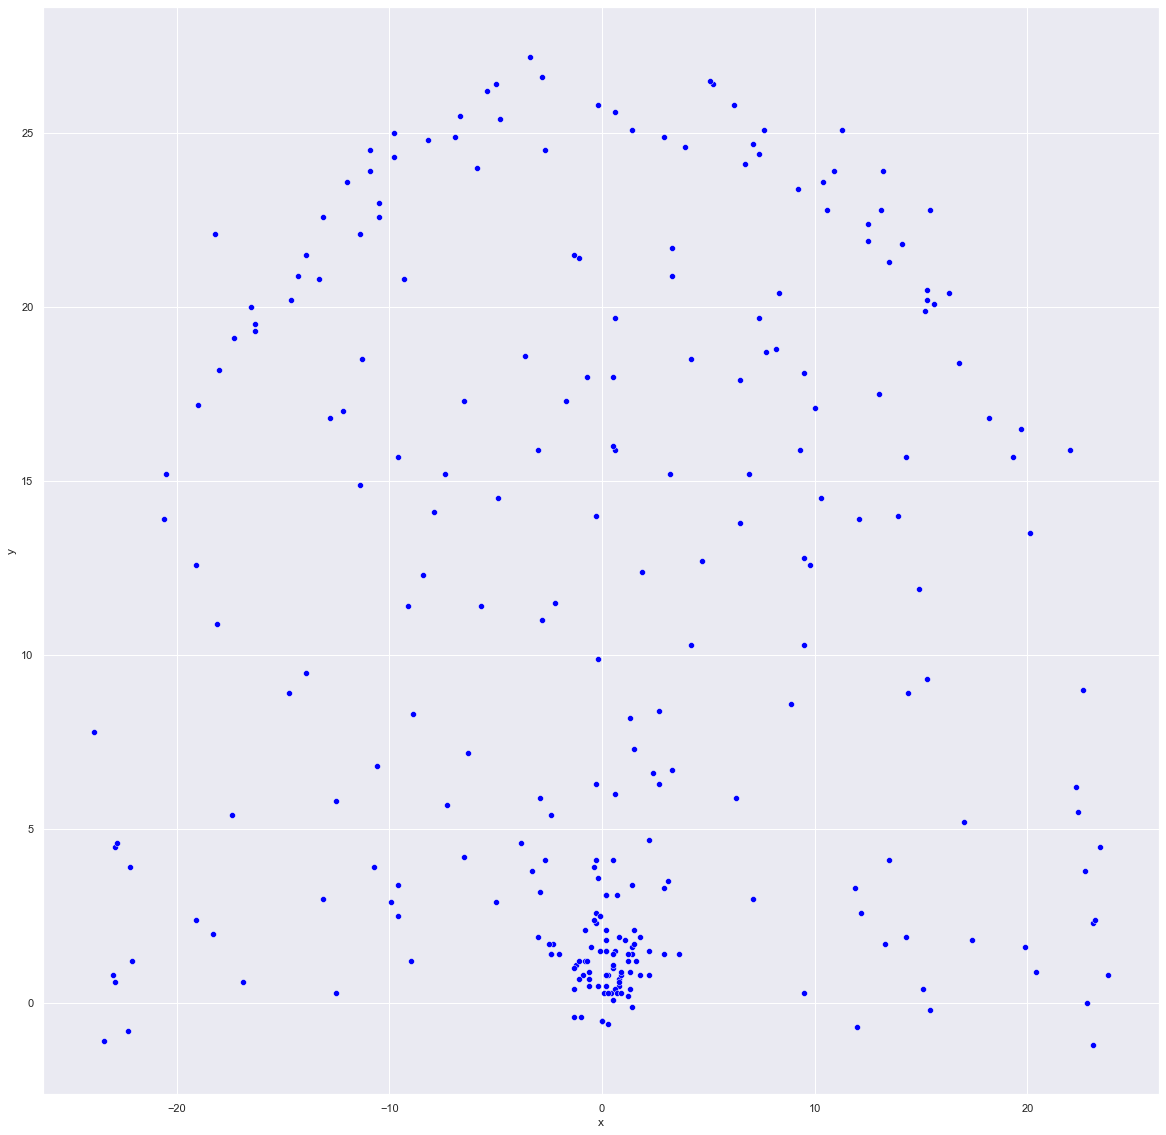

In [53]:
sns.scatterplot(x='x', y='y', data=Team_A, color='blue');
sns.set(rc={'figure.figsize':(15,15)})

In [54]:
def draw_court(ax=None, color="blue", lw=1, shotzone=False, outer_lines=False):
    """Returns an axes with a basketball court drawn onto to it.
    This function draws a court based on the x and y-axis values that the NBA
    stats API provides for the shot chart data.  For example the center of the
    hoop is located at the (0,0) coordinate.  Twenty-two feet from the left of
    the center of the hoop in is represented by the (-220,0) coordinates.
    So one foot equals +/-10 units on the x and y-axis.
    Parameters
    ----------
    ax : Axes, optional
        The Axes object to plot the court onto.
    color : matplotlib color, optional
        The color of the court lines.
    lw : float, optional
        The linewidth the of the court lines.
    outer_lines : boolean, optional
        If `True` it draws the out of bound lines in same style as the rest of
        the court.
    Returns
    -------
    ax : Axes
        The Axes object with the court on it.
    """
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    
    # Draw shotzone Lines
    # Based on Advanced Zone Mode
    if (shotzone == True):
        inner_circle = Circle((0, 0), radius=80, linewidth=lw, color='black', fill=False)
        outer_circle = Circle((0, 0), radius=160, linewidth=lw, color='black', fill=False)
        corner_three_a_x =  Rectangle((-250, 92.5), 30, 0, linewidth=lw, color=color)
        corner_three_b_x = Rectangle((220, 92.5), 30, 0, linewidth=lw, color=color)
        
        # 60 degrees
        inner_line_1 = Rectangle((40, 69.28), 80, 0, 60, linewidth=lw, color=color)
        # 120 degrees
        inner_line_2 = Rectangle((-40, 69.28), 80, 0, 120, linewidth=lw, color=color)
        
        # Assume x distance is also 40 for the endpoint
        inner_line_3 = Rectangle((53.20, 150.89), 290, 0, 70.53, linewidth=lw, color=color)
        inner_line_4 = Rectangle((-53.20, 150.89), 290, 0, 109.47, linewidth=lw, color=color)
        
        # Assume y distance is also 92.5 for the endpoint
        inner_line_5 = Rectangle((130.54, 92.5), 80, 0, 35.32, linewidth=lw, color=color)
        inner_line_6 = Rectangle((-130.54, 92.5), 80, 0, 144.68, linewidth=lw, color=color)
        
        
        # List of the court elements to be plotted onto the axes
        court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc, inner_circle, outer_circle,
                          corner_three_a_x, corner_three_b_x,
                          inner_line_1, inner_line_2, inner_line_3, inner_line_4, inner_line_5, inner_line_6]
    else:
        # List of the court elements to be plotted onto the axes
        court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc]
    
    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
        

    return ax

In [55]:
def shot_chart(data, title="", color="b",
               xlim=(-250, 250), ylim=(422.5, -47.5), line_color="blue",
               court_color="white", court_lw=2, outer_lines=False,
               flip_court=False, gridsize=None, 
               ax=None, despine=False, **kwargs):

    if ax is None:
        ax = plt.gca()

    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])

    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=18)

    # draws the court
    draw_court(ax, color=line_color, lw=court_lw, outer_lines=outer_lines)

    # separate color by make or miss    
    x_missed = Team_A[Team_A['fgmade'] == '0']['x']
    y_missed = Team_A[Team_A['fgmade'] == '0']['y']

    x_made = Team_A[Team_A['fgmade'] == '1']['x']
    y_made = Team_A[Team_A['fgmade'] == '1']['y']

    # plot missed shots
    ax.scatter(x_missed, y_missed, c='r', marker="x", s=300, linewidths=3, **kwargs)
    # plot made shots
    ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker="o", s=100, linewidths=3, **kwargs)
        
    # Set the spines to match the rest of court lines, makes outer_lines
    # somewhate unnecessary
    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(line_color)

    if despine:
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

    return ax

In [56]:
plt.rcParams['figure.figsize'] = (12, 11)

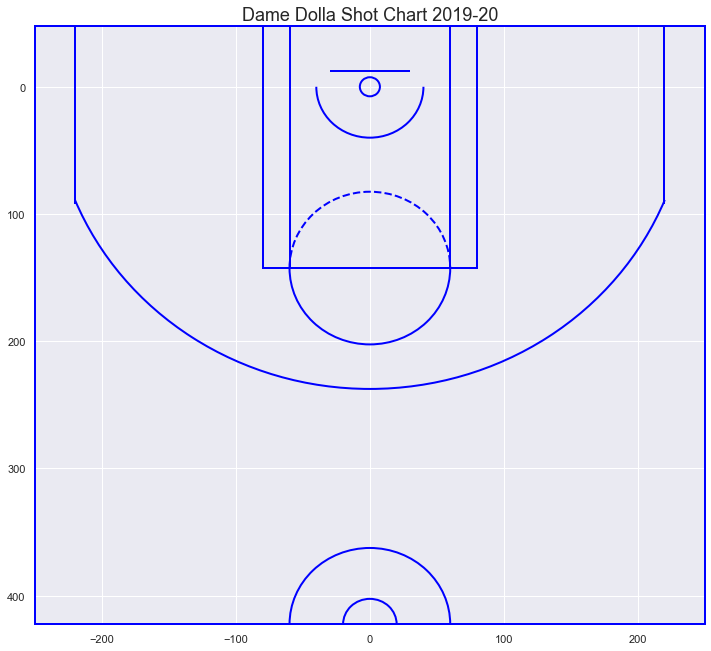

FG%:  0.446 (125-280)


In [57]:
shot_chart(Team_A, title="Dame Dolla Shot Chart 2019-20")
plt.show()
print("FG%: ", "{0:.3f}".format(Team_A['fgmade'].sum()/len(Team_A['fgmade'])), "({0}-{1})".format(Team_A['fgmade'].sum(),len(Team_A['fgmade'])))

In [58]:
def shot_chart(data, title="", color="b",
               xlim=(-250, 250), ylim=(422.5, -47.5), line_color="blue",
               court_color="white", court_lw=2, outer_lines=False,
               flip_court=False, gridsize=None, 
               ax=None, despine=False, **kwargs):

    if ax is None:
        ax = plt.gca()

    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])

    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=18)

    

    # separate color by make or miss    
    x_missed = Team_A[Team_A['fgmade'] == '0']['x']
    y_missed = Team_A[Team_A['fgmade'] == '0']['y']

    x_made = Team_A[Team_A['fgmade'] == '1']['x']
    y_made = Team_A[Team_A['fgmade'] == '1']['y']

    # plot missed shots
    ax.scatter(x_missed, y_missed, c='r', marker="x", s=300, linewidths=3, **kwargs)
    # plot made shots
    ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker="o", s=100, linewidths=3, **kwargs)
        
    # Set the spines to match the rest of court lines, makes outer_lines
    # somewhate unnecessary
    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(line_color)

    if despine:
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

    return ax

In [59]:
    x_missed = Team_A[Team_A['fgmade'] == '0']['x']
    y_missed = Team_A[Team_A['fgmade'] == '0']['y']

    x_made = Team_A[Team_A['fgmade'] == '1']['x']
    y_made = Team_A[Team_A['fgmade'] == '1']['y']

    # plot missed shots
    plt.scatter(x_missed, y_missed, c='r', marker="x", s=300, linewidths=3, **kwargs)
    # plot made shots
    plt.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker="o", s=100, linewidths=3, **kwargs)

NameError: name 'kwargs' is not defined